# Capstone Project 1 Exploratory Data Analysis
## Molly McNamara

### Import packages and dataset

In [2]:
import pandas as pd
pd.set_option("display.max.columns", 500)
import matplotlib.pyplot as plt
pollution = pd.read_csv('~/Desktop/cleanpollution.csv', index_col='Unnamed: 0')

In [3]:
pollution.head(3)

,Site_Num,Date_Local,State,County,City,NO2_Mean,NO2_1stMaxValue,NO2_1stMaxHour,NO2_AQI,O3_Mean,O3_1stMaxValue,O3_1stMaxHour,O3_AQI,SO2_Mean,SO2_1stMaxValue,SO2_1stMaxHour,SO2_AQI,CO_Mean,CO_1stMaxValue,CO_1stMaxHour,CO_AQI
0,1,2000-01-01,California,San Diego,Chula Vista,10.913043,20.0,0.0,19.0,0.031625,0.043,9.0,36.0,2.064907,2.65,6.0,4.0,0.603382,0.95,8.0,9.0
1,1,2000-01-02,California,San Diego,Chula Vista,10.869565,35.0,18.0,33.0,0.026833,0.040,9.0,34.0,1.748137,2.00,1.0,3.0,0.560145,1.15,20.5,10.0
2,1,2000-01-03,California,San Diego,Chula Vista,27.782609,45.0,17.0,42.0,0.011333,0.022,9.0,19.0,2.172671,3.00,14.0,4.0,1.174003,2.30,21.0,20.0


In [4]:
pollution.describe()

,Site_Num,NO2_Mean,NO2_1stMaxValue,NO2_1stMaxHour,NO2_AQI,O3_Mean,O3_1stMaxValue,O3_1stMaxHour,O3_AQI,SO2_Mean,SO2_1stMaxValue,SO2_1stMaxHour,SO2_AQI,CO_Mean,CO_1stMaxValue,CO_1stMaxHour,CO_AQI
count,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412856.000000,412650.000000
mean,1110.318559,12.943202,25.557748,11.731099,24.038367,0.026092,0.039184,10.175389,35.964773,1.903953,4.564842,9.639881,7.245721,0.369380,0.626315,7.887068,6.042532
std,1955.594515,9.593288,16.118488,7.863331,15.274345,0.011415,0.015316,3.996333,19.623752,2.804391,7.503252,6.336021,12.034155,0.316870,0.627269,6.736911,5.942352
min,1.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.725155,-1.400000,0.000000,0.000000,-0.420834,-0.400000,0.000000,0.000000
25%,9.000000,5.816667,13.000000,5.000000,12.000000,0.017792,0.029000,9.000000,25.000000,0.254167,0.800000,4.500000,1.000000,0.185688,0.250000,3.000000,2.000000
50%,69.000000,10.869565,24.000000,9.000000,23.000000,0.025875,0.038000,10.000000,33.000000,0.996875,2.000000,9.500000,3.000000,0.293478,0.450000,6.500000,5.000000
75%,1039.000000,17.916667,36.000000,20.000000,34.000000,0.033917,0.048000,11.000000,42.000000,2.390016,5.250000,13.500000,9.000000,0.466666,0.750000,11.000000,8.000000
max,9997.000000,139.541667,267.000000,23.000000,132.000000,0.095083,0.141000,23.000000,218.000000,321.612500,350.800000,23.000000,200.000000,7.151993,17.700000,23.000000,201.000000


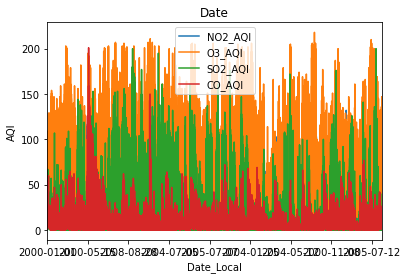

In [5]:
y_columns = ['NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']
pollution.plot(x='Date_Local', y=y_columns)
plt.title('Date')
plt.ylabel('AQI')
plt.show()

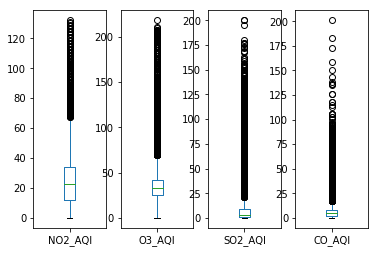

In [6]:
cols = ['NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']
pollution[cols].plot(kind='box', subplots=True)
plt.show()

In [17]:
top10cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
top10 = pollution[pollution['City'].isin(top10cities)]

In [20]:
top10['Site_Num'].nunique()

19

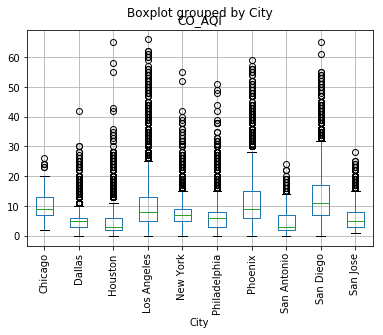

In [21]:
top10.boxplot(column='CO_AQI', by='City', rot=90)
plt.show()


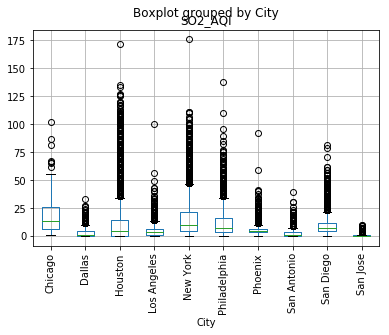

In [22]:
top10.boxplot(column='SO2_AQI', by='City', rot=90)
plt.show()

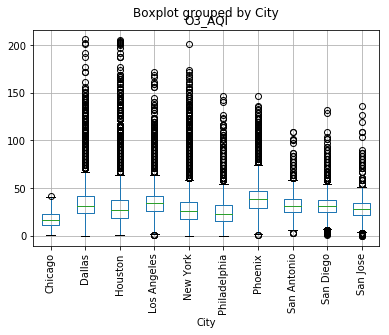

In [23]:
top10.boxplot(column='O3_AQI', by='City', rot=90)
plt.show()

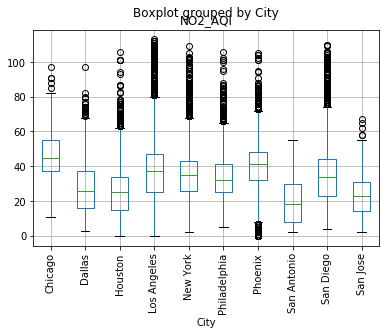

In [24]:
top10.boxplot(column='NO2_AQI', by='City', rot=90)
plt.show()

In [64]:
top5cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
top5 = pollution[pollution['City'].isin(top5cities)]

